In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Raw data

In [2]:
barra_file = '/g/data/xv83/dbi599/rba/WSDI/BARRA-R2/wsdi_yr_BARRA-R2_aus-states-cities_1980-2024.csv'
df_barra = pd.read_csv(barra_file)

In [3]:
def plot_location(model, experiment, location, start_year=1950):
    """Scatterplot for a given location"""

    infile = f'/g/data/xv83/dbi599/rba/WSDI/{model}/{experiment}/wsdi_yr_{model}_{experiment}_ensemble_aus-states-cities_1850-2100.csv'
    df = pd.read_csv(infile)
    fig, ax = plt.subplots(figsize=[15,7])
    sns.scatterplot(
        ax=ax,
        data=df[df['year'] >= start_year],
        x='year',
        y=location,
        hue='run',
    )
    sns.scatterplot(
        ax=ax,
        data=df_barra,
        x='year',
        y=location,
        color='black',
        label='BARRA-R2',
    )
    ax.set_ylabel('WSDI')
    ax.set_title(f'{model} - {experiment} - {location}')
    ax.grid()
    plt.show()

In [4]:
def plot_dist(model, experiment, location, start_year=1950, end_year=2014):
    """Histogram for a given location"""

    infile = f'/g/data/xv83/dbi599/rba/WSDI/{model}/{experiment}/wsdi_yr_{model}_{experiment}_ensemble_aus-states-cities_1850-2100.csv'
    df = pd.read_csv(infile)
    df_ref = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    fig, ax = plt.subplots()
    sns.histplot(
        ax=ax,
        data=df_ref,
        x=location,
    )
    ax.set_ylabel('WSDI')
    ax.set_title(f'{model} - {experiment} - {location}')
    ax.grid()
    plt.show()

#### ACCESS-CM2

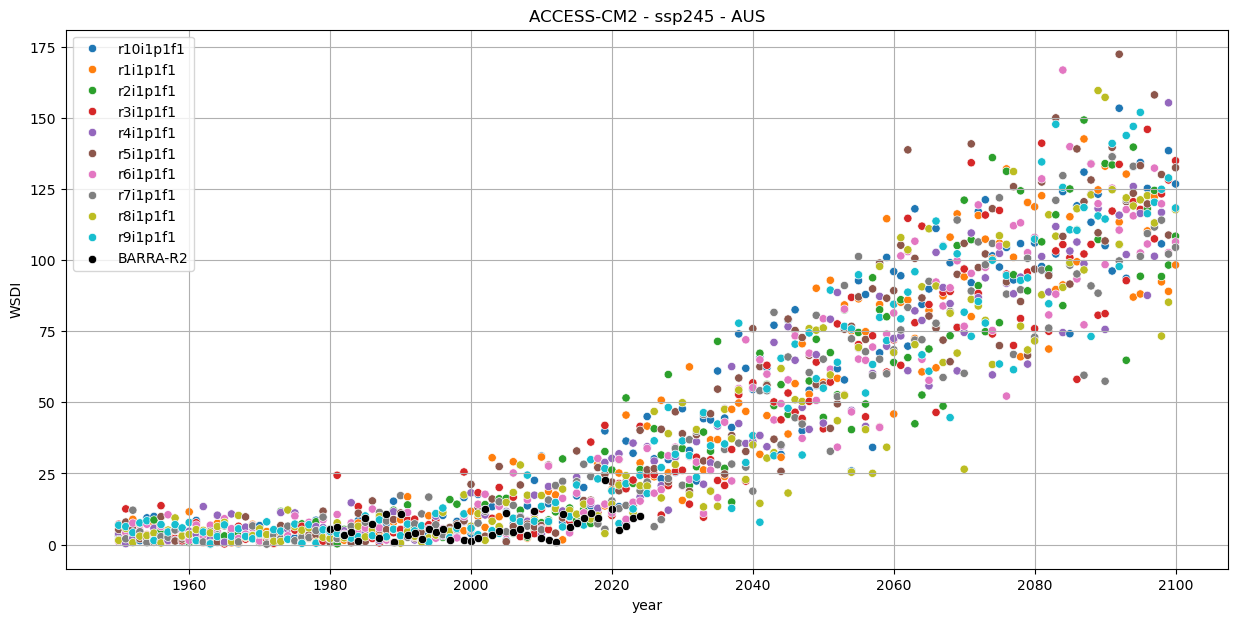

In [5]:
plot_location('ACCESS-CM2', 'ssp245', 'AUS')

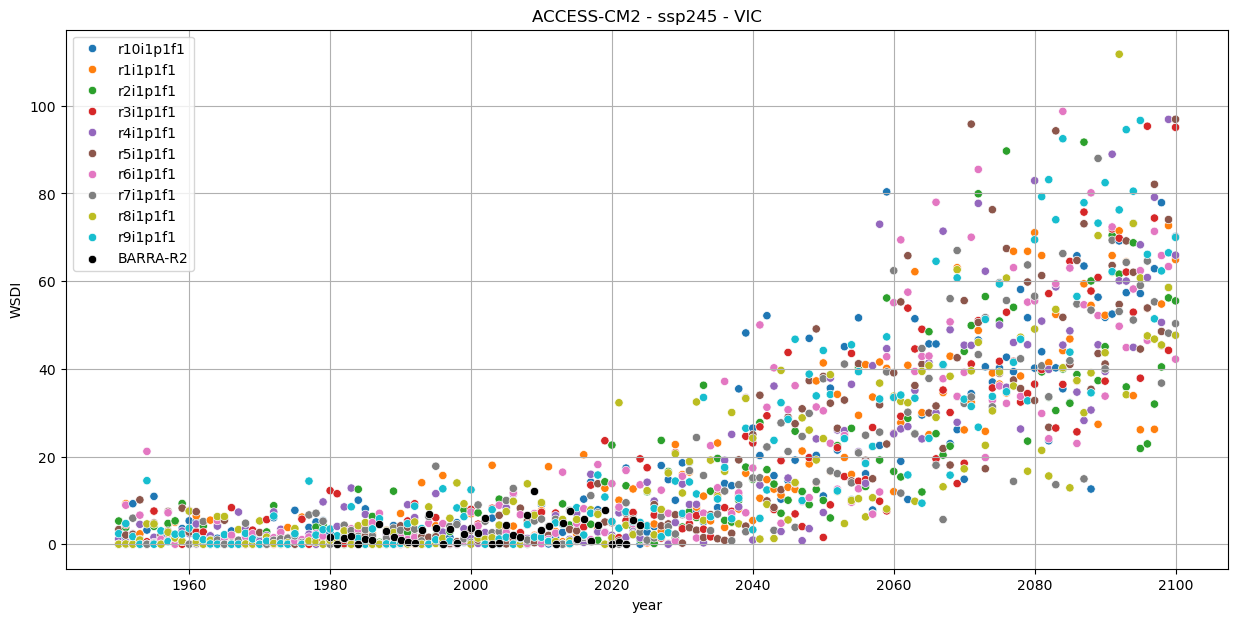

In [6]:
plot_location('ACCESS-CM2', 'ssp245', 'VIC')

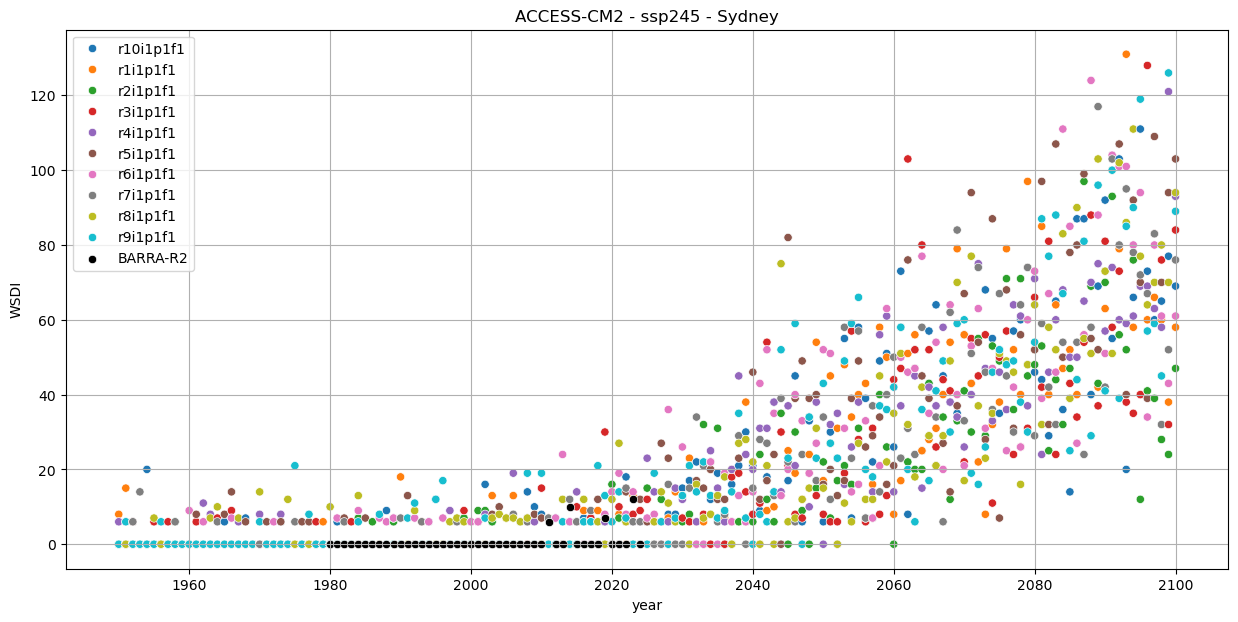

In [7]:
plot_location('ACCESS-CM2', 'ssp245', 'Sydney')

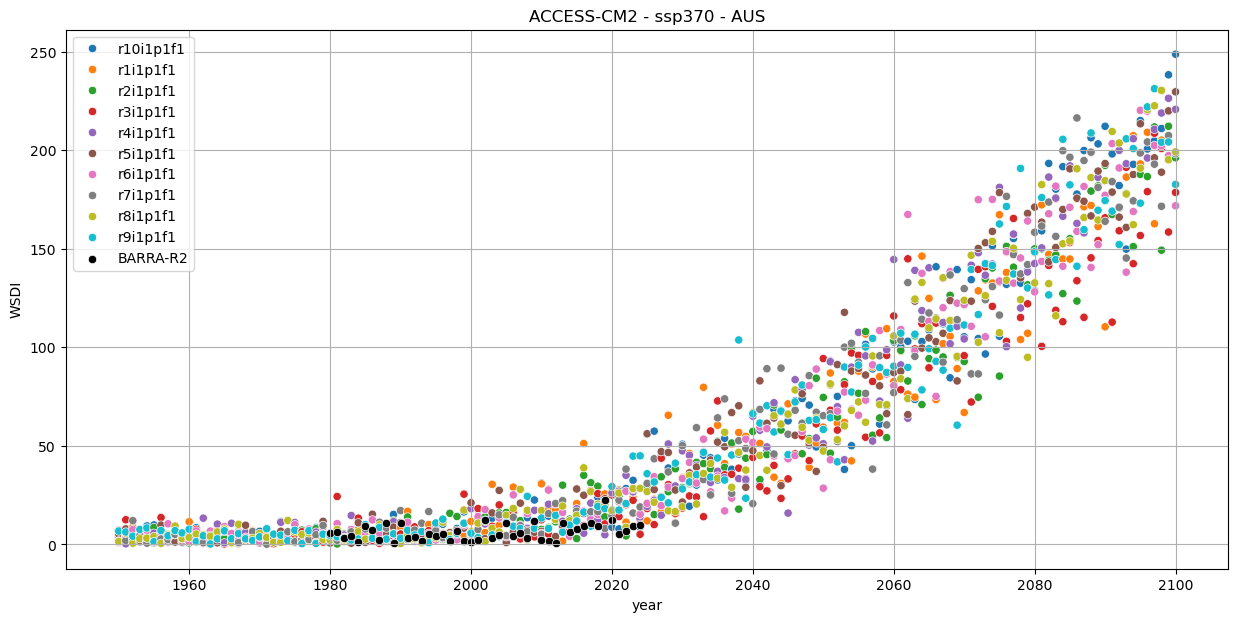

In [8]:
plot_location('ACCESS-CM2', 'ssp370', 'AUS')

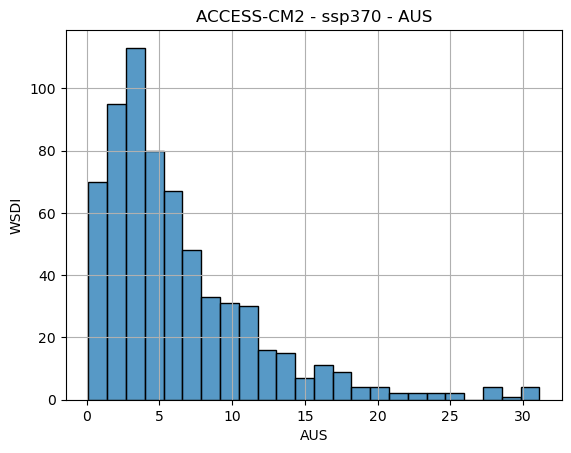

In [9]:
plot_dist('ACCESS-CM2', 'ssp370', 'AUS')

#### MPI-ESM1-2-LR

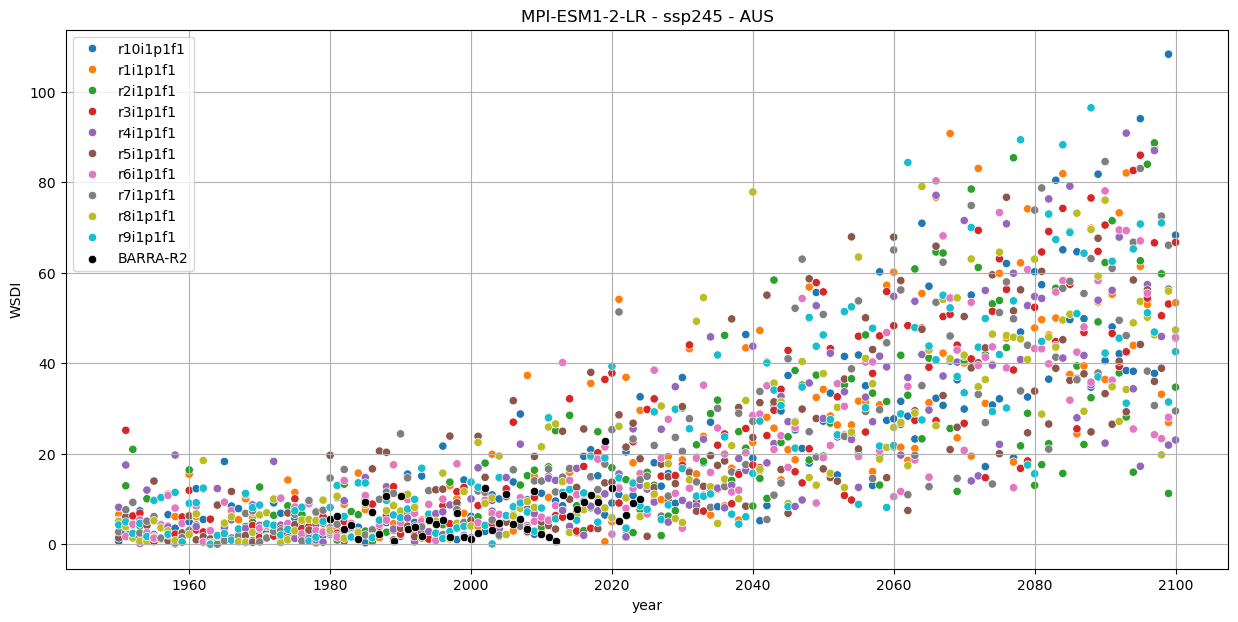

In [16]:
plot_location('MPI-ESM1-2-LR', 'ssp245', 'AUS')

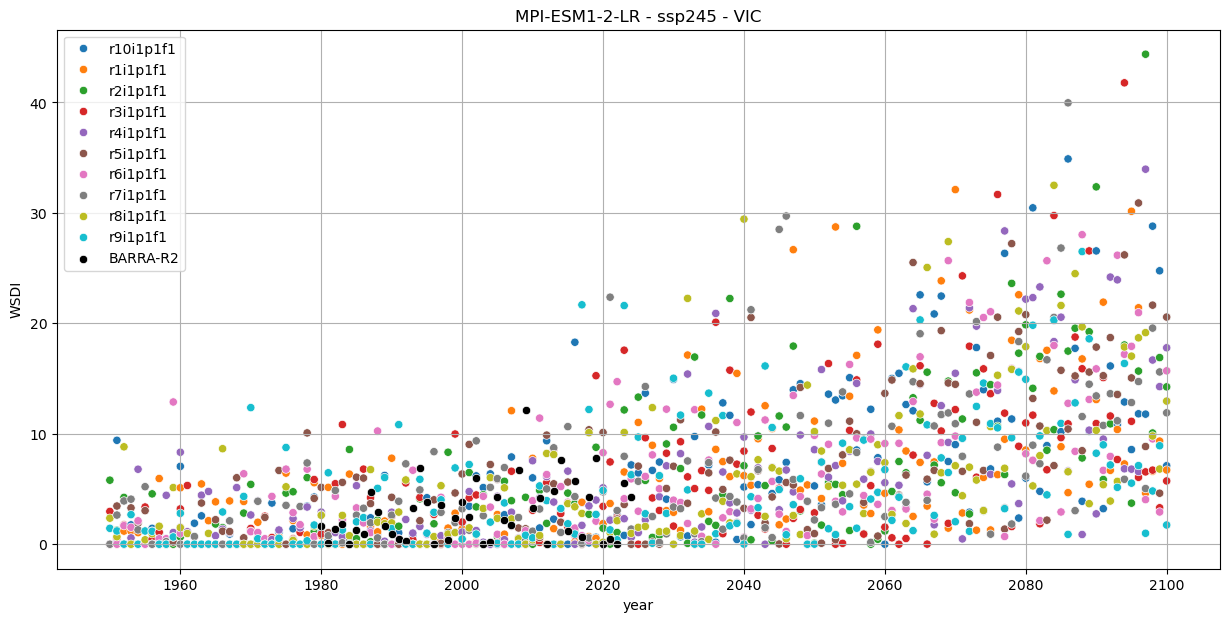

In [19]:
plot_location('MPI-ESM1-2-LR', 'ssp245', 'VIC')

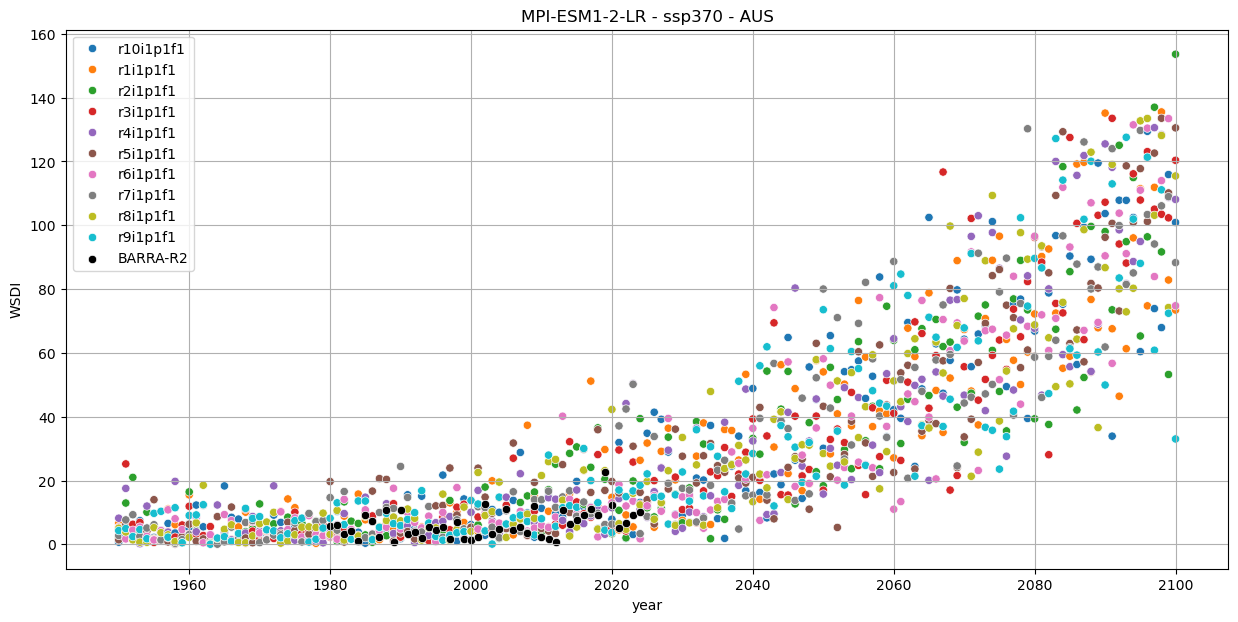

In [17]:
plot_location('MPI-ESM1-2-LR', 'ssp370', 'AUS')

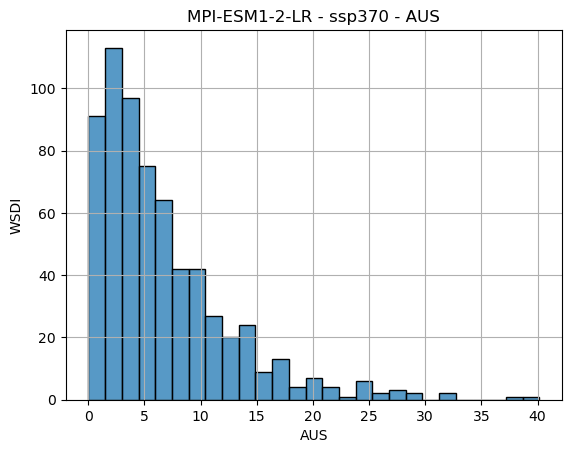

In [26]:
plot_dist('MPI-ESM1-2-LR', 'ssp370', 'AUS')

## Ensemble

In [31]:
colors = {
    'ssp126': 'tab:blue',
    'ssp245': 'tab:green',
    'ssp370': 'tab:orange',
    'ssp585': 'tab:red',
}

linestyles = {
    'ACCESS-CM2': '-',
    'MPI-ESM1-2-LR': ':',
}

return_conversion = {
    '1-in-50 year': '98-0p',
    '1-in-40 year': '97-5p',
    '1-in-30 year': '96-7p',
    '1-in-20 year': '95-0p',
    '1-in-10 year': '90-0p',
}

def plot_ensemble_odds(
    models,
    experiments,
    location,
    return_period,
):
    """Ensemble odds of a year higher than a given return period for a given location."""

    # Plot
    fig, ax = plt.subplots()
    plabel = return_conversion[return_period]
    for model in models:
        for experiment in experiments:
            infile = f'/g/data/xv83/dbi599/rba/WSDI/{model}/{experiment}/wsdi_yr_{plabel}-likelihood_{model}_{experiment}_aus-states-cities_1860-2091.csv'
            df = pd.read_csv(infile, header=7, index_col='year')
            df = df[location]
            sns.lineplot(
                ax=ax,
                data=df,
                label=f'{model} ({experiment})',
                color=colors[experiment],
                linestyle=linestyles[model],
            )
    ax.set_xlabel('year')
    ax.set_ylabel(f'odds of exceeding {return_period} event (%)') 
    ax.set_title(f'WSDI - {location}')
    ax.grid()
    plt.show()

    # Supporting info
    for model in models:
        pfile = f'/g/data/xv83/dbi599/rba/WSDI/{model}/{experiments[0]}/wsdi_yr_percentiles_{model}_{experiments[0]}_aus-states-cities_1950-2014.csv' 
        pdf = pd.read_csv(pfile, header=6, index_col='percentile')
        pdf = pdf[location]
        p = float(plabel[0:-1].replace('-', '.'))
        pval = pdf.loc[p]
        print(f'{return_period} event, {model}: {pval}')
        
    obs = pd.read_csv(
        '/g/data/xv83/dbi599/rba/WSDI/BARRA-R2/wsdi_yr_BARRA-R2_aus-states-cities_1980-2024.csv',
        index_col='year',
    )
    print('Top 10 years in BARRA-R2:')
    print(obs[location].sort_values(ascending=False)[0:15])

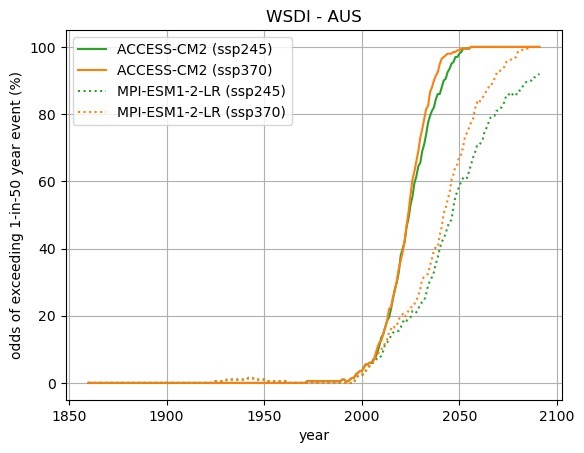

1-in-50 year event, ACCESS-CM2: 22.61
1-in-50 year event, MPI-ESM1-2-LR: 24.98
Top 10 years in BARRA-R2:
year
2019    22.76
2002    12.54
2020    12.35
2009    11.88
2005    11.08
2017    10.99
2013    10.82
1990    10.78
1988    10.72
2024    10.06
1985     9.31
2018     9.28
2016     9.26
2023     9.21
2015     7.74
Name: AUS, dtype: float64


In [32]:
plot_ensemble_odds(
    ['ACCESS-CM2', 'MPI-ESM1-2-LR'],
    ['ssp245', 'ssp370'],
    'AUS',
    '1-in-50 year',
)

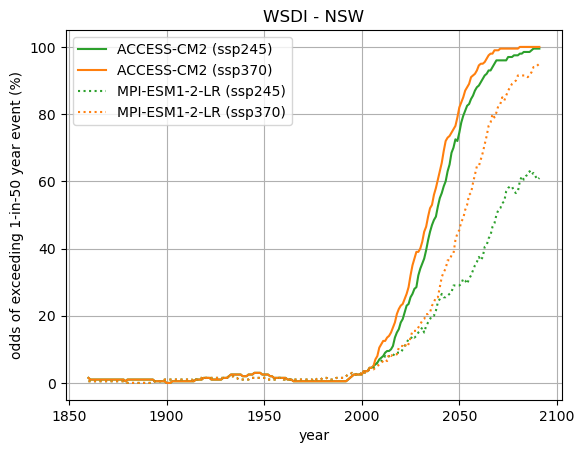

1-in-50 year event, ACCESS-CM2: 18.46
1-in-50 year event, MPI-ESM1-2-LR: 16.27
Top 10 years in BARRA-R2:
year
2018    22.48
2019    21.84
2023    21.49
2014    14.59
2004    13.96
2016    13.83
2009    12.99
2005    10.70
1995     7.83
1980     7.59
2017     7.54
1994     7.35
1982     6.92
2006     6.54
1986     6.11
Name: NSW, dtype: float64


In [33]:
plot_ensemble_odds(
    ['ACCESS-CM2', 'MPI-ESM1-2-LR'],
    ['ssp245', 'ssp370'],
    'NSW',
    '1-in-50 year',
)

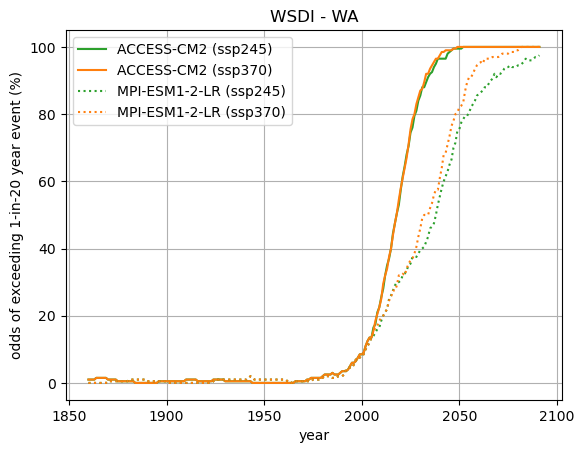

1-in-20 year event, ACCESS-CM2: 16.56
1-in-20 year event, MPI-ESM1-2-LR: 18.01
Top 10 years in BARRA-R2:
year
2019    25.77
2020    20.42
1990    15.47
1985    15.05
2024    14.78
2002    13.85
2005    11.09
1998    10.89
1988    10.04
2023     9.58
2015     7.88
1981     7.84
2021     7.77
1986     7.08
2009     6.79
Name: WA, dtype: float64


In [34]:
plot_ensemble_odds(
    ['ACCESS-CM2', 'MPI-ESM1-2-LR'],
    ['ssp245', 'ssp370'],
    'WA',
    '1-in-20 year',
)